In [191]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tqdm import tqdm
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

Обучим простейшую модель

In [231]:
N = 3
np.random.seed(42)

x = np.array([[np.random.randint(i + N) * np.random.randint(j + N) for i in range(N)] for j in range(N)])
y = np.array([np.random.randint(N) for i in range(N)])
x

array([[0, 4, 0],
       [2, 4, 4],
       [0, 6, 4]])

In [232]:
input = Input(shape=[x.shape[1]])
#d = Dense(10, activation='sigmoid')(input)
d = Dense(1, activation='linear')(input)

In [233]:
model = Model(input, d)
model.compile(optimizer='adam', loss='mse')

hist = model.fit(x, y, epochs=100, verbose=0)

In [266]:
model.summary()

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)          │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14 (60.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10 (44.00 B)

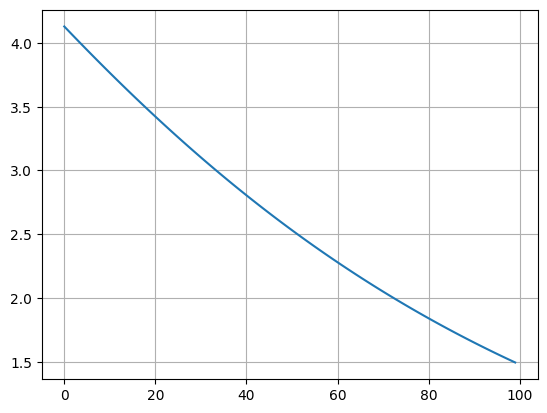

In [267]:
plt.plot(hist.history['loss'])
plt.grid()

Получим веса этой модели

In [268]:
model.get_weights()

[array([[ 0.6562195 ],
        [ 0.07998111],
        [-0.36389032]], dtype=float32),
 array([0.09066173], dtype=float32)]

Зададим рандомные начальные признаки

In [296]:
x_test = np.array([np.random.randint(N) for i in range(N)]).reshape(1, N)
x_test = np.array([1, 2, 3]).reshape(1, N)
x_old = x_test.copy()
x_test, model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


(array([[1, 2, 3]]), array([[-0.18482754]], dtype=float32))

Посмотрим на аналитический градиент на первой эпохе, высчитанный вручную.

In [303]:
gr = [(2 * (model.predict(x_test)) * i).flatten()[0] for i in model.get_weights()[0]]
gr

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[-0.24257486, -0.029565424, 0.1345139]

Запускаем градиентный спуск по признакам, используя квадрат выхода модели $model$ как функцию потерь

In [297]:
def loss(x):
    return pow(model(x), 2)

loss_hist = [model.predict(x_test, verbose=0).flatten()[0]]
l = 0.01
for epoch in tqdm(range(1000)):
    if epoch == 1:
        gr_numeric = np.array(grad).flatten()
    xx = tf.Variable(tf.convert_to_tensor(x_test, dtype=tf.float32))
    with tf.GradientTape() as tape:
        tape.watch(xx)
        loss_val = loss(xx)
        grad = tape.gradient(loss_val, [xx])
    x_test = x_test - l * np.array(grad).flatten()
    loss_hist.append(model.predict(x_test, verbose=0).flatten()[0])

    if epoch % 50 == 0:
        print(np.array(loss_val).flatten()[0])

  0%|          | 2/1000 [00:00<02:06,  7.87it/s]

0.034161218


  5%|▌         | 53/1000 [00:05<01:27, 10.83it/s]

0.01086647


 10%|█         | 102/1000 [00:09<01:24, 10.66it/s]

0.003456552


 15%|█▌        | 153/1000 [00:15<01:12, 11.70it/s]

0.0010995071


 20%|██        | 201/1000 [00:19<01:09, 11.54it/s]

0.00034974725


 25%|██▌       | 252/1000 [00:25<01:52,  6.64it/s]

0.000111250934


 30%|███       | 302/1000 [00:30<01:08, 10.21it/s]

3.538845e-05


 35%|███▌      | 352/1000 [00:35<01:10,  9.15it/s]

1.1256851e-05


 40%|████      | 403/1000 [00:41<00:56, 10.64it/s]

3.580596e-06


 45%|████▌     | 453/1000 [00:45<00:50, 10.79it/s]

1.1389133e-06


 50%|█████     | 501/1000 [00:51<01:29,  5.57it/s]

3.6231364e-07


 55%|█████▌    | 551/1000 [00:56<00:42, 10.64it/s]

1.1521008e-07


 60%|██████    | 603/1000 [01:01<00:36, 10.93it/s]

3.6667412e-08


 65%|██████▌   | 653/1000 [01:07<00:33, 10.33it/s]

1.167283e-08


 70%|███████   | 702/1000 [01:12<00:29, 10.21it/s]

3.7152925e-09


 75%|███████▌  | 753/1000 [01:18<00:56,  4.37it/s]

1.1771709e-09


 80%|████████  | 801/1000 [01:23<00:17, 11.14it/s]

3.743899e-10


 85%|████████▌ | 851/1000 [01:28<00:13, 10.73it/s]

1.2109919e-10


 90%|█████████ | 902/1000 [01:33<00:09, 10.71it/s]

3.7416792e-11


 95%|█████████▌| 953/1000 [01:39<00:04, 10.46it/s]

1.2210288e-11


100%|██████████| 1000/1000 [01:44<00:00,  9.56it/s]


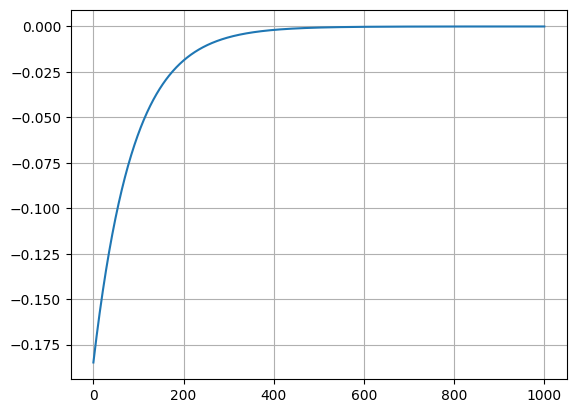

In [298]:
plt.plot(loss_hist)
plt.grid()

Смотрим на значения градиента и новых начальных условий

In [299]:
model.predict(x_test).flatten(), x_test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


(array([-1.9446015e-06], dtype=float32),
 array([[1.21299301, 2.02595994, 2.88188998]]))

Сравним аналитический градиент **gr** и численный **gr_numeric**

In [304]:
print(f'Аналитический градиент {gr}')
print(f'Численный градиент {gr_numeric}')

Аналитический градиент [-0.24257486, -0.029565424, 0.1345139]
Численный градиент [-0.24257486 -0.02956542  0.1345139 ]


Сравним старые и новые признаки

In [306]:
print(f'Старые {x_old}')
print(f'Новые {x_test}')

Старые [[1 2 3]]
Новые [[1.21299301 2.02595994 2.88188998]]
